In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt








#finding missing values of data sets (train and test data sets)
df=pd.read_csv(r"C:\Users\narth\Downloads\pulsar_data_train (3).csv")
unknown_df=pd.read_csv(r"C:\Users\narth\Downloads\pulsar_data_test (2).csv")

y = np.array(df['target_class'])
x = np.array(df.drop('target_class', axis=1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
x_train_df = pd.DataFrame(x_train)
x_train_df.info()


x_train_df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8769 non-null   float64
 1   1       8769 non-null   float64
 2   2       7533 non-null   float64
 3   3       8769 non-null   float64
 4   4       8769 non-null   float64
 5   5       7966 non-null   float64
 6   6       8769 non-null   float64
 7   7       8313 non-null   float64
dtypes: float64(8)
memory usage: 548.2 KB


0       0
1       0
2    1236
3       0
4       0
5     803
6       0
7     456
dtype: int64

In [20]:
#dealing with missing values 
E_k_i_train=2
E_k_i_test=2
#position where data of Excess kurtosis of the integrated profile are missing
position_E_k_i_train_missing = np.where(np.isnan(x_train[:, E_k_i_train]))[0]
position_E_k_i_test_missing = np.where(np.isnan(x_test[:, E_k_i_train]))[0]


Std_D_S_C_train=5
Std_D_S_C_test=5
#position where data of Standard deviation of the DM-SNR curve are missing
position_Std_D_S_C_train_missing = np.where(np.isnan(x_train[:, Std_D_S_C_train]))[0]
position_Std_D_S_C_test_missing = np.where(np.isnan(x_test[:, Std_D_S_C_test]))[0]


S_D_S_C_train=7
S_D_S_C_test=7

#position where data of Skewness of the DM-SNR curve are missing
position_S_d_D_S_C_train_missing = np.where(np.isnan(x_train[:, S_D_S_C_train]))[0]
position_S_d_D_S_C_test_missing = np.where(np.isnan(x_test[:,S_D_S_C_test]))[0]


In [21]:
#next find the locations of target variable is 0 and 1

i_y0_train=np.where(y_train==0)[0]
i_y1_train=np.where(y_train==1)[0]


##intial guesses

#the means values of Excess kurtosis of the integrated profile where y_train=0 and where the same where y_train=1
y0_mean_E_k_i_train=np.nanmean(x_train[i_y0_train,E_k_i_train])
y1_mean_E_k_i_train=np.nanmean(x_train[i_y1_train,E_k_i_train])

# Replace NaN in Excess kurtosis of the integrated profile where y_train=0 with y0_mean_E_k_i_train
x_train[i_y0_train, E_k_i_train] = np.nan_to_num(x_train[i_y0_train, E_k_i_train], nan=y0_mean_E_k_i_train)

# Replace NaN in Excess kurtosis of the integrated profile where y_train=1 with y1_mean_E_k_i_train
x_train[i_y1_train, E_k_i_train] = np.nan_to_num(x_train[i_y1_train, E_k_i_train], nan=y1_mean_E_k_i_train)



#the means values of Standard deviation of the DM-SNR curve where y_train=0 and where the same where y_train=1
y0_mean_Std_D_S_C_train=np.nanmean(x_train[i_y0_train,Std_D_S_C_train])
y1_mean_Std_D_S_C_train=np.nanmean(x_train[i_y1_train,Std_D_S_C_train])

# Replace NaN in Standard deviation of the DM-SNR curve where y_train=0 with y0_mean_Std_D_S_C_train
x_train[i_y0_train, Std_D_S_C_train] = np.nan_to_num(x_train[i_y0_train, Std_D_S_C_train], nan=y0_mean_Std_D_S_C_train)

# Replace NaN in Standard deviation of the DM-SNR curve where y_train=1 with y1_mean_Std_D_S_C_train
x_train[i_y1_train,Std_D_S_C_train ] = np.nan_to_num(x_train[i_y1_train,Std_D_S_C_train ], nan=y1_mean_Std_D_S_C_train)




#the means values of Skewness of the DM-SNR curve where y_train=0 and where the same where y_train=1
y0_mean_S_D_S_C_train=np.nanmean(x_train[i_y0_train,S_D_S_C_train])
y1_mean_S_D_S_C_train=np.nanmean(x_train[i_y1_train,S_D_S_C_train])

# Replace NaN in Skewness of the DM-SNR curve where y_train=0 with y0_mean_Std_D_S_C_train
x_train[i_y0_train, S_D_S_C_train] = np.nan_to_num(x_train[i_y0_train, S_D_S_C_train], nan=y0_mean_S_D_S_C_train)

# Replace NaN in Skewness of the DM-SNR curve where y_train=1 with y1_mean_Std_D_S_C_train
x_train[i_y1_train,S_D_S_C_train ] = np.nan_to_num(x_train[i_y1_train,S_D_S_C_train ], nan=y1_mean_S_D_S_C_train)

Before:
 [[ 1.1212e+02  4.9660e+01  3.1000e-01 ...  1.4190e+01  1.2810e+01
   1.7852e+02]
 [ 1.6343e+02  4.3740e+01 -3.8000e-01 ...  1.2850e+01  1.1090e+01
   1.6542e+02]
 [ 1.2406e+02  4.7960e+01  1.3000e-01 ...  1.4790e+01  9.5600e+00
   1.1705e+02]
 ...
 [ 7.8420e+01  3.3080e+01  2.0600e+00 ...  1.9740e+01  1.0650e+01
   1.1615e+02]
 [ 1.2641e+02  4.9260e+01 -5.0000e-02 ...  2.3610e+01  6.9700e+00
   5.2170e+01]
 [ 1.0811e+02  5.5370e+01  1.8000e-01 ...  2.9090e+01  5.8600e+00
   3.8190e+01]]
y0_mean_E_k_i_train=0.21, y1_mean_E_k_i_train=3.10


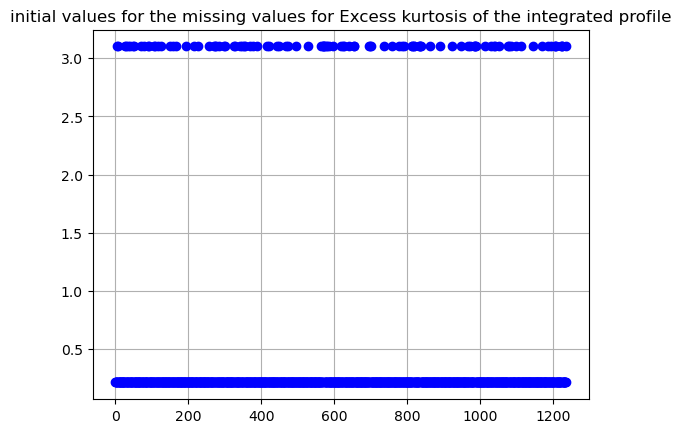

In [22]:
#plotting initial guess 

print('Before:\n', x_train.round(2))
print('y0_mean_E_k_i_train={:,.2f}, y1_mean_E_k_i_train={:,.2f}'.format(y0_mean_E_k_i_train,y1_mean_E_k_i_train))
plt.plot(x_train[position_E_k_i_train_missing,E_k_i_train],'bo')

plt.title('initial values for the missing values for Excess kurtosis of the integrated profile')
plt.grid()
plt.show()

Before:
 [[ 1.1212e+02  4.9660e+01  3.1000e-01 ...  1.4190e+01  1.2810e+01
   1.7852e+02]
 [ 1.6343e+02  4.3740e+01 -3.8000e-01 ...  1.2850e+01  1.1090e+01
   1.6542e+02]
 [ 1.2406e+02  4.7960e+01  1.3000e-01 ...  1.4790e+01  9.5600e+00
   1.1705e+02]
 ...
 [ 7.8420e+01  3.3080e+01  2.0600e+00 ...  1.9740e+01  1.0650e+01
   1.1615e+02]
 [ 1.2641e+02  4.9260e+01 -5.0000e-02 ...  2.3610e+01  6.9700e+00
   5.2170e+01]
 [ 1.0811e+02  5.5370e+01  1.8000e-01 ...  2.9090e+01  5.8600e+00
   3.8190e+01]]
y0_mean_Std_D_S_C_train=23.30,y1_mean_Std_D_S_C_train=56.61


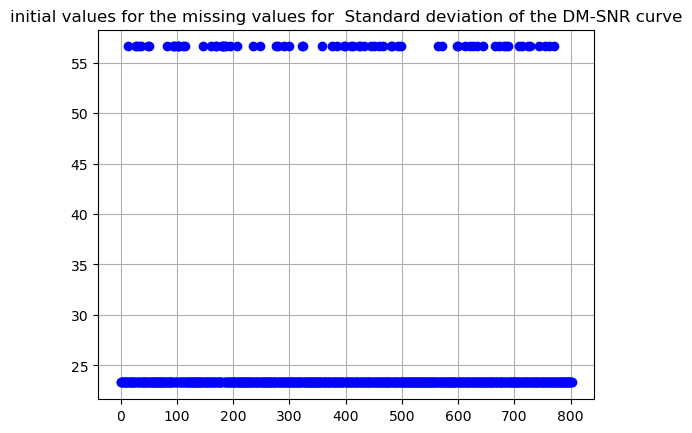

In [23]:
#plotting intial guess 

print('Before:\n', x_train.round(2))
print('y0_mean_Std_D_S_C_train={:,.2f},y1_mean_Std_D_S_C_train={:,.2f}'.format(y0_mean_Std_D_S_C_train,y1_mean_Std_D_S_C_train))
plt.plot(x_train[position_Std_D_S_C_train_missing,Std_D_S_C_train],'bo')

plt.title('initial values for the missing values for  Standard deviation of the DM-SNR curve')
plt.grid()
plt.show()

Before:
 [[ 1.1212e+02  4.9660e+01  3.1000e-01 ...  1.4190e+01  1.2810e+01
   1.7852e+02]
 [ 1.6343e+02  4.3740e+01 -3.8000e-01 ...  1.2850e+01  1.1090e+01
   1.6542e+02]
 [ 1.2406e+02  4.7960e+01  1.3000e-01 ...  1.4790e+01  9.5600e+00
   1.1705e+02]
 ...
 [ 7.8420e+01  3.3080e+01  2.0600e+00 ...  1.9740e+01  1.0650e+01
   1.1615e+02]
 [ 1.2641e+02  4.9260e+01 -5.0000e-02 ...  2.3610e+01  6.9700e+00
   5.2170e+01]
 [ 1.0811e+02  5.5370e+01  1.8000e-01 ...  2.9090e+01  5.8600e+00
   3.8190e+01]]
y0_mean_S_D_S_C_train=114.52,y1_mean_S_D_S_C_train=19.78


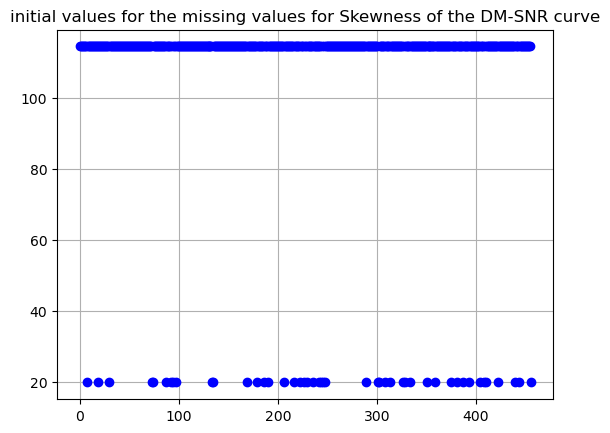

In [24]:
#plotting initial guess 

print('Before:\n', x_train.round(2))
print('y0_mean_S_D_S_C_train={:,.2f},y1_mean_S_D_S_C_train={:,.2f}'.format(y0_mean_S_D_S_C_train,y1_mean_S_D_S_C_train))
plt.plot(x_train[position_S_d_D_S_C_train_missing,S_D_S_C_train],'bo')

plt.title('initial values for the missing values for Skewness of the DM-SNR curve')
plt.grid()
plt.show()

In [25]:
x_train_df = pd.DataFrame(x_train)
x_train_df.info()


x_train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8769 non-null   float64
 1   1       8769 non-null   float64
 2   2       8769 non-null   float64
 3   3       8769 non-null   float64
 4   4       8769 non-null   float64
 5   5       8769 non-null   float64
 6   6       8769 non-null   float64
 7   7       8769 non-null   float64
dtypes: float64(8)
memory usage: 548.2 KB


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


After:
 [[ 1.1212e+02  4.9660e+01  3.1000e-01 ...  1.4190e+01  1.2810e+01
   1.7852e+02]
 [ 1.6343e+02  4.3740e+01 -3.8000e-01 ...  1.2850e+01  1.1090e+01
   1.6542e+02]
 [ 1.2406e+02  4.7960e+01  1.3000e-01 ...  1.4790e+01  9.5600e+00
   1.1705e+02]
 ...
 [ 7.8420e+01  3.3080e+01  2.0600e+00 ...  1.9740e+01  1.0650e+01
   1.1615e+02]
 [ 1.2641e+02  4.9260e+01 -5.0000e-02 ...  2.3610e+01  6.9700e+00
   5.2170e+01]
 [ 1.0811e+02  5.5370e+01  1.8000e-01 ...  2.9090e+01  5.8600e+00
   3.8190e+01]]


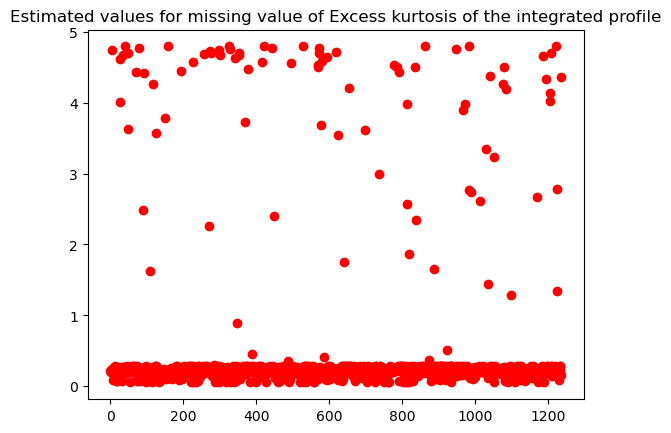

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def proximity_matrix(model, x, normalize=0):
    n_tree = len(model.estimators_)
    leaf = model.apply(x)
    pm = np.zeros(shape=(x.shape[0], x.shape[0]))

    for i in range(n_tree):
        t = leaf[:, i]
        pm += np.equal.outer(t, t) * 1.
    
    # This should happen after looping through all trees
    np.fill_diagonal(pm, 0)
    
    if normalize == 0:
        return pm / n_tree
    else:
        return pm / pm.sum(axis=0, keepdims=True)

n_estimators = 50
n_depth = 5

# Loop over 3 iterations as per your logic
for i in range(3):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth, oob_score=True)
    model.fit(x_train, y_train)
    
    # Create proximity matrix
    pm = proximity_matrix(model, x_train, normalize=1)
    
    # Estimate the missing values of Excess kurtosis of the integrated profile
    x_E_k_i = x_train[:, E_k_i_train].copy()
    u_E_k_i = np.dot(pm, x_E_k_i)  # Update values of Excess kurtosis of the integrated profile
    
    # Update the missing values
    x_train[position_E_k_i_train_missing, E_k_i_train] = u_E_k_i[position_E_k_i_train_missing]

# Print the results after updating
print('\nAfter:\n', x_train.round(2))

# Plot the estimated missing values
plt.plot(x_train[position_E_k_i_train_missing, E_k_i_train], 'ro')
plt.title('Estimated values for missing value of Excess kurtosis of the integrated profile')
plt.show()



After:
 [[ 1.1212e+02  4.9660e+01  3.1000e-01 ...  1.4190e+01  1.2810e+01
   1.7852e+02]
 [ 1.6343e+02  4.3740e+01 -3.8000e-01 ...  1.2850e+01  1.1090e+01
   1.6542e+02]
 [ 1.2406e+02  4.7960e+01  1.3000e-01 ...  1.4790e+01  9.5600e+00
   1.1705e+02]
 ...
 [ 7.8420e+01  3.3080e+01  2.0600e+00 ...  1.9740e+01  1.0650e+01
   1.1615e+02]
 [ 1.2641e+02  4.9260e+01 -5.0000e-02 ...  2.3610e+01  6.9700e+00
   5.2170e+01]
 [ 1.0811e+02  5.5370e+01  1.8000e-01 ...  2.9090e+01  5.8600e+00
   3.8190e+01]]


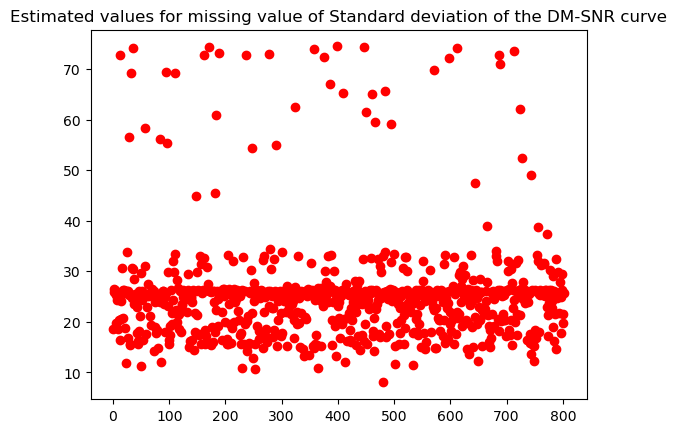

In [27]:
# Loop over 5 iterations
for i in range(3):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth, oob_score=True)
    model.fit(x_train, y_train)
    
    # Create proximity matrix
    pm = proximity_matrix(model, x_train, normalize=1)
    
    # Estimate the missing values of Standard deviation of the DM-SNR curve
    x_Std_D_S_C = x_train[:, Std_D_S_C_train].copy()
    u_Std_D_S_C = np.dot(pm, x_Std_D_S_C)  # Update values of Standard deviation of the DM-SNR curve
    
    # Update the missing values in x_train
    x_train[position_Std_D_S_C_train_missing, Std_D_S_C_train] = u_Std_D_S_C[position_Std_D_S_C_train_missing]

# Print the updated values in x_train
print('\nAfter:\n', x_train.round(2))

# Plot the estimated missing values for Standard deviation of the DM-SNR curve
plt.plot(x_train[position_Std_D_S_C_train_missing, Std_D_S_C_train], 'ro')
plt.title('Estimated values for missing value of Standard deviation of the DM-SNR curve')
plt.show()



After:
 [[ 1.1212e+02  4.9660e+01  3.1000e-01 ...  1.4190e+01  1.2810e+01
   1.7852e+02]
 [ 1.6343e+02  4.3740e+01 -3.8000e-01 ...  1.2850e+01  1.1090e+01
   1.6542e+02]
 [ 1.2406e+02  4.7960e+01  1.3000e-01 ...  1.4790e+01  9.5600e+00
   1.1705e+02]
 ...
 [ 7.8420e+01  3.3080e+01  2.0600e+00 ...  1.9740e+01  1.0650e+01
   1.1615e+02]
 [ 1.2641e+02  4.9260e+01 -5.0000e-02 ...  2.3610e+01  6.9700e+00
   5.2170e+01]
 [ 1.0811e+02  5.5370e+01  1.8000e-01 ...  2.9090e+01  5.8600e+00
   3.8190e+01]]


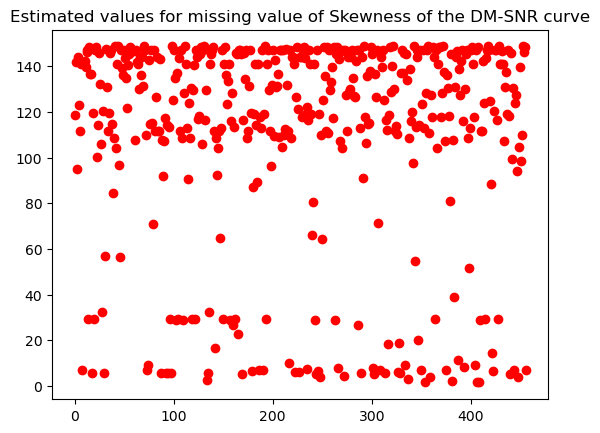

In [28]:
# Loop over 5 iterations
for i in range(3):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth, oob_score=True)
    model.fit(x_train, y_train)
    
    # Create proximity matrix
    pm = proximity_matrix(model, x_train, normalize=1)
    
    # Estimate the missing values of Skewness of the DM-SNR curve
    x_S_D_S_C = x_train[:, S_D_S_C_train].copy()
    u_S_D_S_C = np.dot(pm, x_S_D_S_C)  # Update values of Skewness of the DM-SNR curve
    
    # Update the missing values in x_train
    x_train[position_S_d_D_S_C_train_missing, S_D_S_C_train] = u_S_D_S_C[position_S_d_D_S_C_train_missing]

# Print the updated values in x_train
print('\nAfter:\n', x_train.round(2))

# Plot the estimated missing values for Skewness of the DM-SNR curve
plt.plot(x_train[position_S_d_D_S_C_train_missing, S_D_S_C_train], 'ro')
plt.title('Estimated values for missing value of Skewness of the DM-SNR curve')
plt.show()

In [ ]:
#missing values are replaced with means value 

x_test[position_E_k_i_test_missing,E_k_i_test]=x_train[:,E_k_i_test].mean()
x_test[position_Std_D_S_C_test_missing ,Std_D_S_C_test]=x_train[:,Std_D_S_C_test].mean()
x_test[position_S_d_D_S_C_test_missing , S_D_S_C_test] = x_train[:, S_D_S_C_test].mean()

x_data=np.vstack([x_train,x_test])
pm=proximity_matrix(model,x_data,normalize=1)

#replacing test data E_k_i with values from proximity matrix
x_E=x_data[:,E_k_i_test].copy()
u_E=np.dot(x_E,pm)

x_Std=x_data[:,Std_D_S_C_test].copy()
u_Std=np.dot(x_Std,pm)


x_S_d=x_data[:,S_D_S_C_test].copy()
u_S_d=np.dot(x_S_d,pm)


u_E=u_E[-x_test.shape[0]:]
u_Std=u_Std[-x_test.shape[0]:]
u_S_d=u_S_d[-x_test.shape[0]:]


u_test=x_data[-x_test.shape[0]:]
u_test[position_E_k_i_test_missing,E_k_i_test] = u_E[position_E_k_i_test_missing]
u_test[position_Std_D_S_C_test_missing,Std_D_S_C_test] = u_E[position_Std_D_S_C_test_missing]
u_test[position_S_d_D_S_C_test_missing,S_D_S_C_test] = u_E[position_S_d_D_S_C_test_missing]




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score



Classifier=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
Classifier.fit(x_train,y_train)


#find the accuracy of the model
y_test_pred=Classifier.predict(x_test)
accuracy_score(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

#finding unknown value
#predicting the test result

